<h1>TASK 2</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment Configuration</a></li>
    <li><a href='#002'>Implementing Gradient Descent Algorithm</a></li>
    <li><a href='#003'>Implementing Adam's Optimization Algorithm</a></li>
    <li><a href='#004'>Testing Algorithms</a></li>
    <li><a href='#005'>Function Visualization</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment Configuration</h2>

Importing environment.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings

warnings.filterwarnings(action='ignore')

<a name='002'></a>

<h2>Implementing Gradient Descent Algorithm</h2>

Building gradient vector function.

In [2]:
def gradient_vector(x, y):
    return np.array([np.dot(x, 2), np.dot(y, 2)])

Implementing `Gradient Descent` algorithm.

Function returns coordinates of the extremum point, number of iterations, sequences of x and y values of the original function and loss values at each iteration.

In [3]:
def gradient_descent(vector, lr=0.001, epsilon=0.001, stop_iteration=1000000):
    iteration = 1
    
    x_gradient = np.array([])
    y_gradient =  np.array([])
    loss =  np.array([])
    
    extremum = vector - np.dot(lr, gradient_vector(vector[0], vector[1]))
    
    x_gradient = np.append(x_gradient, extremum[0])
    y_gradient = np.append(y_gradient, extremum[1])
    
    while np.linalg.norm(np.subtract(extremum[0], extremum[1])) > epsilon:
        loss = np.append(loss, np.absolute(vector[0]-extremum[0]))
        vector = extremum
        
        extremum = vector - np.dot(lr, gradient_vector(vector[0], vector[1]))
        
        x_gradient = np.append(x_gradient, extremum[0])
        y_gradient = np.append(y_gradient, extremum[1])
        
        iteration = iteration + 1
        if iteration == stop_iteration:
            break
    
    return np.array([extremum, iteration, x_gradient, y_gradient, loss])

<a name='003'></a>

<h2>Implementing Adam's Optimization Algorithm</h2>

Implementing `Adam's` optimization algorithm.

Function returns coordinates of the extremum point, number of iterations, sequences of x and y values of the original function and loss values at each iteration.

In [4]:
def adam(vector, lr=0.001, epsilon=0.001, beta1=0.9, beta2=0.999, bias=0.00000001, stop_iteration=1000000):
    iteration = 1
    
    x_gradient = np.array([])
    y_gradient =  np.array([])
    loss =  np.array([])
    
    gradient = gradient_vector(vector[0], vector[1])
    
    moment_b1 = np.dot(beta1, 0) + np.dot(1 - beta1, gradient)
    moment_b2 = np.dot(beta1, 0) + np.dot(1 - beta2, np.power(gradient, 2))
    
    biased_b1 = moment_b1 / (1 - np.power(beta1, iteration))
    biased_b2 = moment_b2 / (1 - np.power(beta2, iteration))
    
    extremum = vector - np.dot(lr, biased_b1 / (np.sqrt(biased_b2) + bias))
    
    x_gradient = np.append(x_gradient, extremum[0])
    y_gradient = np.append(y_gradient, extremum[1])
    
    while np.linalg.norm(np.subtract(extremum[0], extremum[1])) > epsilon:
        loss = np.append(loss, np.absolute(vector[0]-extremum[0]))
        iteration = iteration + 1
        vector = extremum
        
        gradient = gradient_vector(vector[0], vector[1])
        
        moment_b1 = np.dot(beta1, moment_b1) + np.dot(1 - beta1, gradient)
        moment_b2 = np.dot(beta1, moment_b2) + np.dot(1 - beta2, np.power(gradient, 2))
        
        biased_b1 = moment_b1 / (1 - np.power(beta1, iteration))
        biased_b2 = moment_b2 / (1 - np.power(beta2, iteration))
        
        extremum = vector - np.dot(lr, biased_b1 / (np.sqrt(biased_b2) + bias))
        
        x_gradient = np.append(x_gradient, extremum[0])
        y_gradient = np.append(y_gradient, extremum[1])
        
        if iteration == stop_iteration:
            break
    
    return np.array([extremum, iteration, x_gradient, y_gradient, loss])

<a name='004'></a>

<h2>Testing Algorithms</h2>

Building function to visualize the search for extremum point.

In [5]:
def plot_contour(x_gradient, y_gradient, vector):
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    contour = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(contour, fontsize=10)
    
    ax.text(x=vector[0]+0.05, y=vector[1]-0.25, s='start', c='r')
    plt.plot(vector[0], vector[1], 'ro')
    
    ax.text(x=x_gradient[-1]+0.05, y=y_gradient[-1]-0.25, s='finish', c='b')
    plt.plot(x_gradient, y_gradient, 'bo')
    
    plt.show()

Building function to plot loss values of the algorithm.

In [6]:
def plot_loss(loss):
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    ax = sns.lineplot(data=loss)
    ax.set(xlabel='Iteration')
    ax.set(ylabel='Value')
    ax.set_title('Losses')
    
    plt.show()

Function initialization for finding extremum point, generation of function values.

In [7]:
def f(x, y):
    return -(1 - np.power(y, 5) + np.power(x, 5)) * np.exp(-np.power(x, 2) - np.power(y, 2))

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Finding extremum point of the function using `Gradient Descent` algorithm with `learning rate` of 0.1.

Function extremum reached at point: (-0.00049, 0.00049).
Number of iterations: 36.


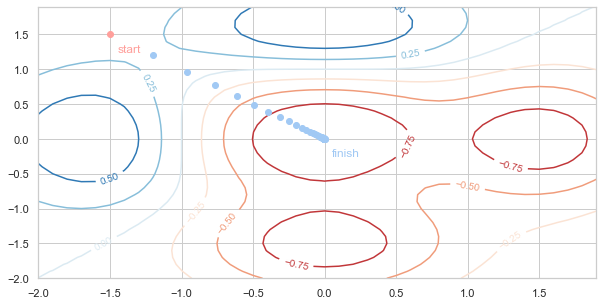

In [9]:
vector = np.array([-1.5, 1.5])
extremum, iteration, gdx_gradient, gdy_gradient, loss = gradient_descent(vector, lr=0.1)

print('Function extremum reached at point: ({:.5f}, {:.5f}).'.format(extremum[0], extremum[1]))
print('Number of iterations: {}.'.format(iteration))

plot_contour(gdx_gradient, gdy_gradient, vector)

Visualization of `Gradient Descent` algorithm loss values.

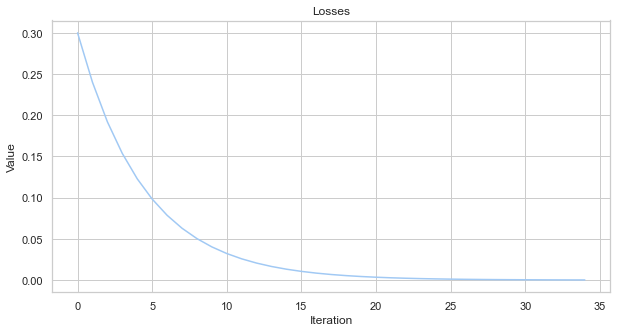

In [10]:
plot_loss(loss)

Finding extremum point of the function using `Adam's` optimization algorithm with `learning rate` of 0.01.

Function extremum reached at point: (0.00992, 0.00899).
Number of iterations: 129.


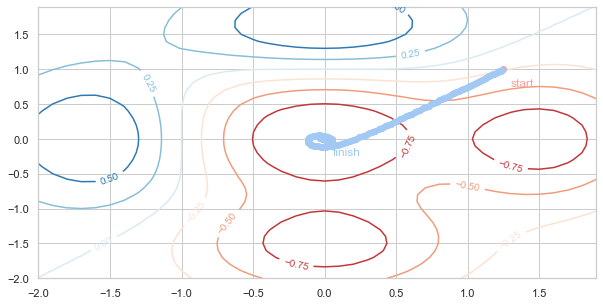

In [11]:
vector = np.array([1.25, 1])
extremum, iteration, adx_gradient, ady_gradient, loss = adam(vector, lr=0.01)

print('Function extremum reached at point: ({:.5f}, {:.5f}).'.format(extremum[0], extremum[1]))
print('Number of iterations: {}.'.format(iteration))

plot_contour(adx_gradient, ady_gradient, vector)

Visualization of `Adam's` optimization algorithm loss values.

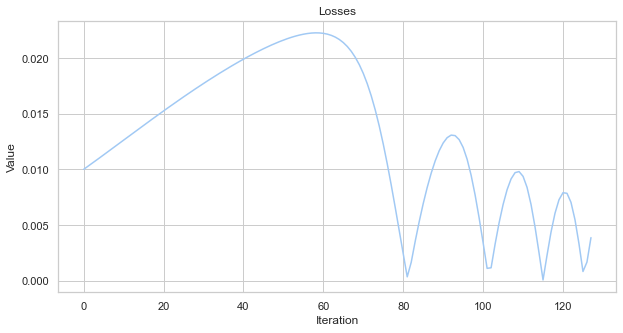

In [12]:
plot_loss(loss)

<a name='005'></a>

<h2>Function Visualization</h2>

Beautiful visualization of algorithms in space.

<IPython.core.display.Javascript object>


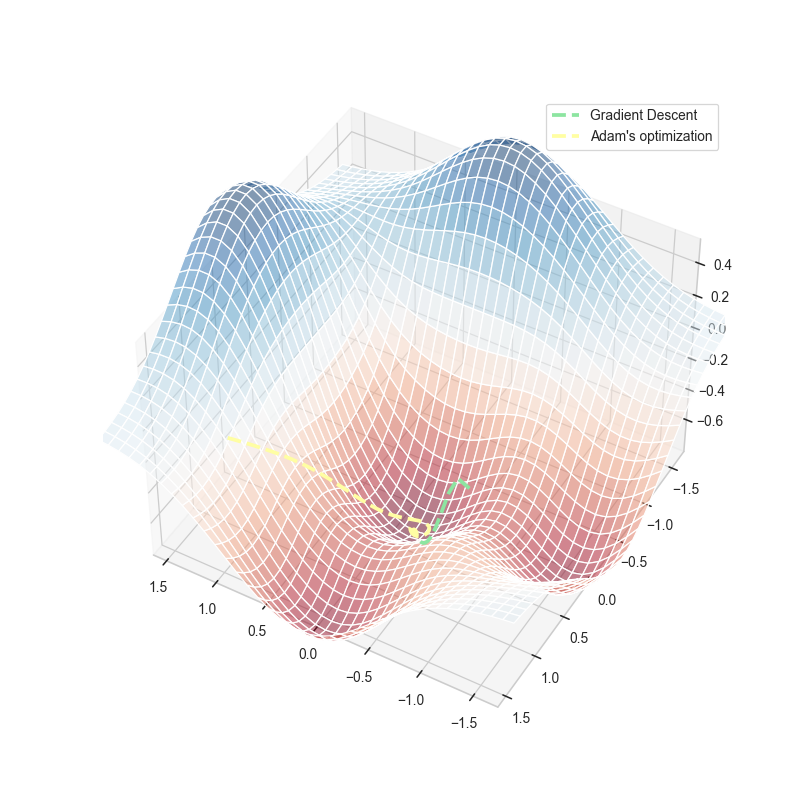

In [14]:
%matplotlib notebook

figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection='3d')
ax.view_init(elev=45, azim=120)
sns.set_theme(style='whitegrid', palette='pastel')

ax.plot_surface(Y, X, Z, cmap=cm.RdBu, alpha=0.5)
ax.plot(xs=gdx_gradient, ys=gdy_gradient, zs=f(gdx_gradient, gdy_gradient), linestyle='--', c='g', lw=3, label="Gradient Descent")
ax.plot(xs=adx_gradient, ys=ady_gradient, zs=f(adx_gradient, ady_gradient), linestyle='--', c='y', lw=3, label="Adam's optimization")

plt.legend()
plt.show()